In [1]:
import pandas as pd 
import numpy as np 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv(r"C:\Training\Academy\Factor Analysis\Cases of Factor Analysis\Kaggle_Airline Passenger Satisfaction\Airline_Passenger_Satisfaction.csv", index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
index,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25,18.0,3,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,1,6.0,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,0,0.0,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,11,9.0,2,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,0,0.0,3,...,5,5,3,3,4,4,3,3,3,satisfied


In [3]:
X = df.iloc[:,9:23]
X.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

# Bartlett's test for adequacy

**In case if p-value>=0.05 then the factor analysis of the data will not be adequate.**

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value 

(5977.586654207146, 0.0)

p-value <0.05 indicates, the observed correlation matrix is not an identity matrix.
The factor analysis is adequate for this data

# Kaiser-Meyer-Olkin (KMO) 

This test measures the suitability of data for factor analysis. The suitable **KMO** value should be greater than 0.5.

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model 

0.7700161579863483

KMO > 0.5 indicates that factor analysis is suitable for the data

In [6]:
fa = FactorAnalyzer()
fa.fit(X)

FactorAnalyzer(rotation_kwargs={})

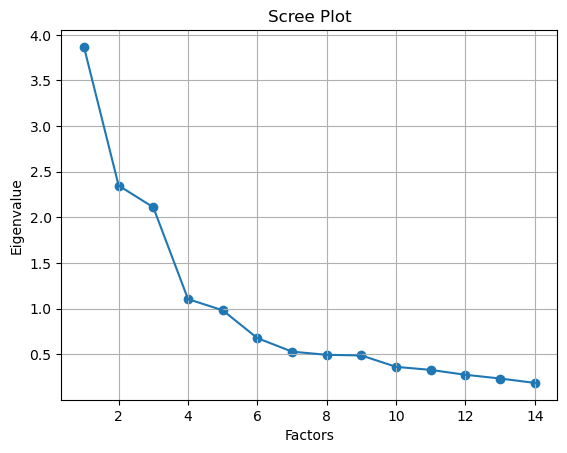

In [7]:
eigen_values, vectors = fa.get_eigenvalues()

# Scree plot of eigen values
plt.scatter(range(1,X.shape[1]+1),eigen_values)
plt.plot(range(1,X.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# Factor analysis with 4 factors

In [8]:
fa = FactorAnalyzer()
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(X)
loadings = fa.loadings_
loadings

array([[ 0.07556826,  0.13547545,  0.70302749,  0.34260379],
       [-0.00541175,  0.09371294,  0.0873274 ,  0.61674384],
       [-0.03524925,  0.01864215,  0.72145809,  0.56964005],
       [-0.00396763, -0.04060227,  0.11683474,  0.76424398],
       [ 0.75659854,  0.03439162,  0.06146037,  0.0158583 ],
       [ 0.34042972,  0.12685175,  0.62689921, -0.09714746],
       [ 0.76696069,  0.07289447,  0.15189491, -0.04666896],
       [ 0.73579354,  0.48939118,  0.08263303,  0.02570102],
       [ 0.10602888,  0.67880748,  0.04894043,  0.00668104],
       [ 0.04376001,  0.50205897,  0.15774795,  0.01812973],
       [ 0.01340629,  0.76313894, -0.00178991,  0.09701597],
       [ 0.10754336,  0.29383591,  0.02931572, -0.01487262],
       [ 0.05084816,  0.7868904 ,  0.00987453,  0.02977884],
       [ 0.87171129,  0.09146507,  0.05217805,  0.00881537]])

In [9]:
factor_df=pd.DataFrame(loadings,index=X.columns)
factor_df.columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4']
factor_df

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,0.075568,0.135475,0.703027,0.342604
Departure/Arrival time convenient,-0.005412,0.093713,0.087327,0.616744
Ease of Online booking,-0.035249,0.018642,0.721458,0.569640
Gate location,-0.003968,-0.040602,0.116835,0.764244
Food and drink,0.756599,0.034392,0.061460,0.015858
Online boarding,0.340430,0.126852,0.626899,-0.097147
Seat comfort,0.766961,0.072894,0.151895,-0.046669
Inflight entertainment,0.735794,0.489391,0.082633,0.025701
On-board service,0.106029,0.678807,0.048940,0.006681
Leg room service,0.043760,0.502059,0.157748,0.018130


In [10]:
factor_df.sort_values(by =['Factor4'], ascending=False)

,Factor1,Factor2,Factor3,Factor4
Gate location,-0.003968,-0.040602,0.116835,0.764244
Departure/Arrival time convenient,-0.005412,0.093713,0.087327,0.616744
Ease of Online booking,-0.035249,0.018642,0.721458,0.569640
Inflight wifi service,0.075568,0.135475,0.703027,0.342604
Baggage handling,0.013406,0.763139,-0.001790,0.097016
Inflight service,0.050848,0.786890,0.009875,0.029779
Inflight entertainment,0.735794,0.489391,0.082633,0.025701
Leg room service,0.043760,0.502059,0.157748,0.018130
Food and drink,0.756599,0.034392,0.061460,0.015858
Cleanliness,0.871711,0.091465,0.052178,0.008815


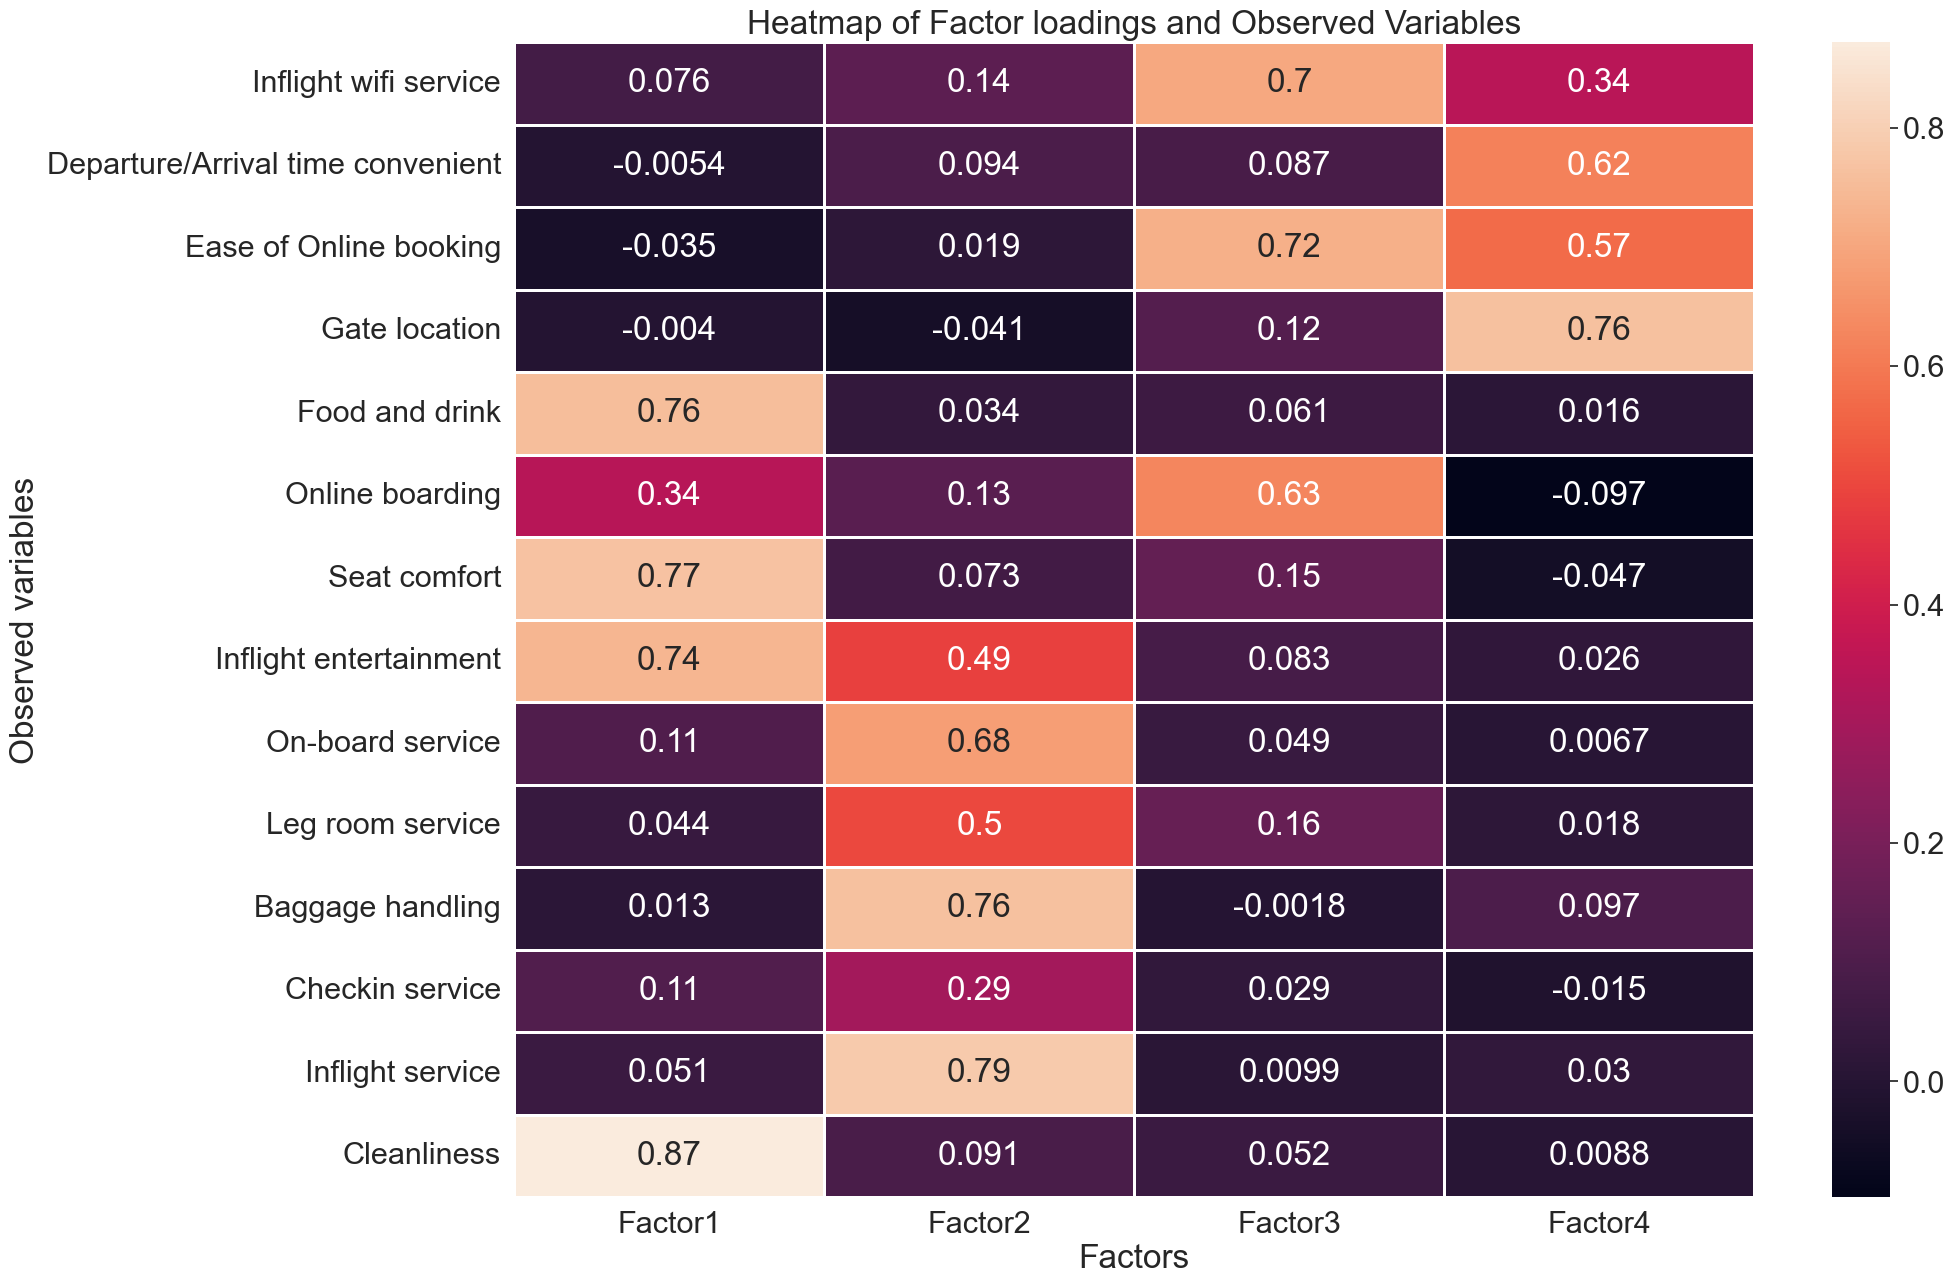

In [11]:
sn.set(font_scale=2)            # set font size
plt.subplots(figsize=(20,15))   # resize heatmap
sn.heatmap(data=factor_df,      # data name
                annot=True,     # setting the parameter values, display factor loading values in each cell
                linewidths=1)   # resize linewidths
plt.title("Heatmap of Factor loadings and Observed Variables")
plt.xlabel("Factors")
plt.ylabel("Observed variables")
plt.show()

### Factor 1

Comfort of Sitting Inside the flight (**Ambience**): Cleanliness, Seat Comfort, Food & Drink, Inflight Entertainment

### Factor 2

**Staff Efficiency**: Inflight Service, Baggage Handling, On-Board Service, Leg Room Service

### Factor 3

**Complementary Services**: Ease of Online Booking, Inflight WiFi, Online Baording

### Factor 4

**Arrival/Departure Convenience**: Gate Location, Departure/Arrival time convenience